In [136]:
import sys
sys.path.insert(0, '../')
from lib.io_functions import load_npy, save_proccesed_variables
from lib.fit_functions import fit_wvfs,scfunc
from lib.sim_functions import rand_scint_times
from lib.dec_functions import deconvolve

import numpy as np
import matplotlib.pyplot as plt
from itertools import product

In [137]:

# Load data for wvf template (LAB)
my_run = load_npy([26],[6],"Analysis_","../data/ana/")



Loaded Analysis_run with keys: dict_keys(['NRun', 'NChannel', 26])
-----------------------------------------------


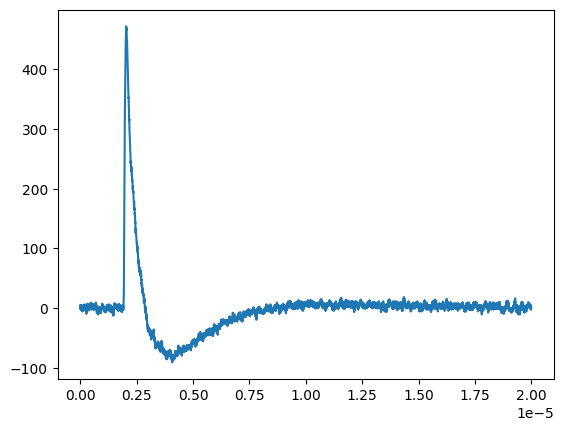

In [138]:
num = np.random.randint(0,len(my_run[26][6]["AnaADC"]))
my_run[26][6]["AnaADC"] = np.roll(my_run[26][6]["AnaADC"],np.argmax(my_run[26][6]["AnaADC"])-np.argmax(my_run[26][6]["AveWvf"]))
plt.plot(my_run[26][6]["Sampling"]*np.arange(len(my_run[26][6]["AnaADC"][num])),my_run[26][6]["AnaADC"][num])

In [139]:
my_run[26][6]["RMSAnaADC"] = np.std(my_run[26][6]["AnaADC"]-my_run[26][6]["AveWvf"][0],axis=0)
print(len(my_run[26][6]["RMSAnaADC"]),my_run[26][6]["RMSAnaADC"])

5000 [4.47877147 4.53000494 4.53378601 ... 4.46260869 4.51503271 4.50544695]


In [150]:
%matplotlib qt
plt.plot(my_run[26][6]["Sampling"]*np.arange(len(my_run[26][6]["RMSAnaADC"])),my_run[26][6]["RMSAnaADC"],label="Time profile STD")
plt.plot(my_run[26][6]["Sampling"]*np.arange(len(my_run[26][6]["AveWvf"][0])),my_run[26][6]["AveWvf"][0],label="Average WVF")
plt.title("Time profile STD wrt average")
plt.xlabel("Time in [s]")
plt.ylabel("Amp in [ADC]")
plt.grid(True)
plt.legend()